classe immagine selezionata:  Raspberry___healthy con index:  23
Percorso immagine: color\Raspberry___healthy\0a1b30a5-f81b-4fe8-9221-78ccba5e3a13___Mary_HL 6221.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step

Classe Immagine selezionata: Raspberry___healthy
Index predetto: 23
Classe predetta: Raspberry___healthy


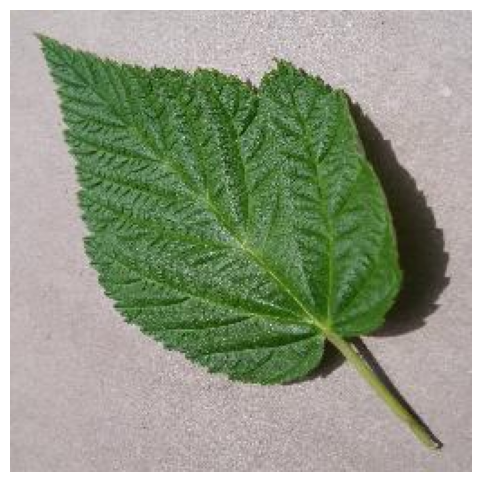

In [3]:
from matplotlib import pyplot as plt
import os
import tensorflow as tf
import numpy as np
from PIL import Image

DATA_DIR = 'color'  
all_data_dir = os.path.join(DATA_DIR)
classes = sorted(os.listdir(all_data_dir))  # Elenco delle sottodirectory (una per classe)

def get_image_path(class_index, image_index):
    # Ottieni il nome della classe corrispondente
    class_name = classes[class_index]
    # Percorso alla directory della classe
    class_dir = os.path.join(all_data_dir, class_name)
    # Elenco delle immagini nella classe
    images = os.listdir(class_dir)
    # Seleziona l'immagine corrispondente all'indice fornito
    image_path = os.path.join(class_dir, images[image_index])
    print("classe immagine selezionata: ", class_name, "con index: ", class_index)
    print(f"Percorso immagine: {image_path}")
    return image_path

# Specifica la classe e l'immagine da selezionare
class_index = 23
image_index = 12

# Ottieni il percorso dell'immagine selezionata
image_path = get_image_path(class_index, image_index)

# Carica e preprocessa l'immagine
test_image = tf.keras.utils.load_img(image_path, target_size=(224, 224))
test_image = tf.keras.utils.img_to_array(test_image) / 255.0
test_image = tf.expand_dims(test_image, axis=0)

# Carica il modello
model = tf.keras.models.load_model('plant_disease_model_created.keras')

# Effettua la predizione
result = model.predict(test_image, batch_size=1)[0]

# Determina la classe predetta
index = np.argmax(result)
predicted_class = classes[index]

# Stampa i risultati
print()
print(f"Classe Immagine selezionata: {classes[class_index]}")
print(f"Index predetto: {index}")
print(f"Classe predetta: {predicted_class}")

plt.figure(figsize=(6, 6))
plt.imshow(Image.open(image_path))
plt.axis('off')
plt.show()